In [180]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## Loading data

In [181]:
df = pd.read_csv('Fraud.csv')

In [182]:
df.head()   #Visual representation of how to daataset is

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [183]:
df.shape

(6362620, 11)

#### Dataset have

Records: 6362620 \
Features: 11

In [184]:
df.info()  #Column info and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


The DataFrame contains 11 columns.

-  3 columns have int64 data type.
-  5 columns have float64 data type.
-  3 columns have object data type.
-  The DataFrame's memory usage is approximately 534.0+ MB.

In [185]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


- It provide statistical analysis of data.
- It give count,mean,max,standarad deviation

### find null percentage of columns

In [186]:
df.isnull().mean()*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

#### No null values are present in data.

In [187]:
col_obj = df.select_dtypes(include=object).columns
col_obj

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [188]:
for col in col_obj:
    print(col,':')
    print('Number of unique values in ',col,' ',df[col].nunique())
    print(df[col].unique())
    print('-'*20)

type :
Number of unique values in  type   5
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
--------------------
nameOrig :
Number of unique values in  nameOrig   6353307
['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
--------------------
nameDest :
Number of unique values in  nameDest   2722362
['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']
--------------------


Lets understand 'type' column

In [189]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

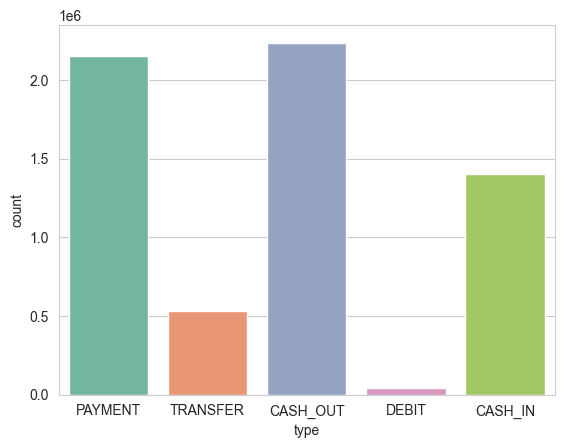

In [190]:
sns.countplot(x=df['type'],palette='Set2')

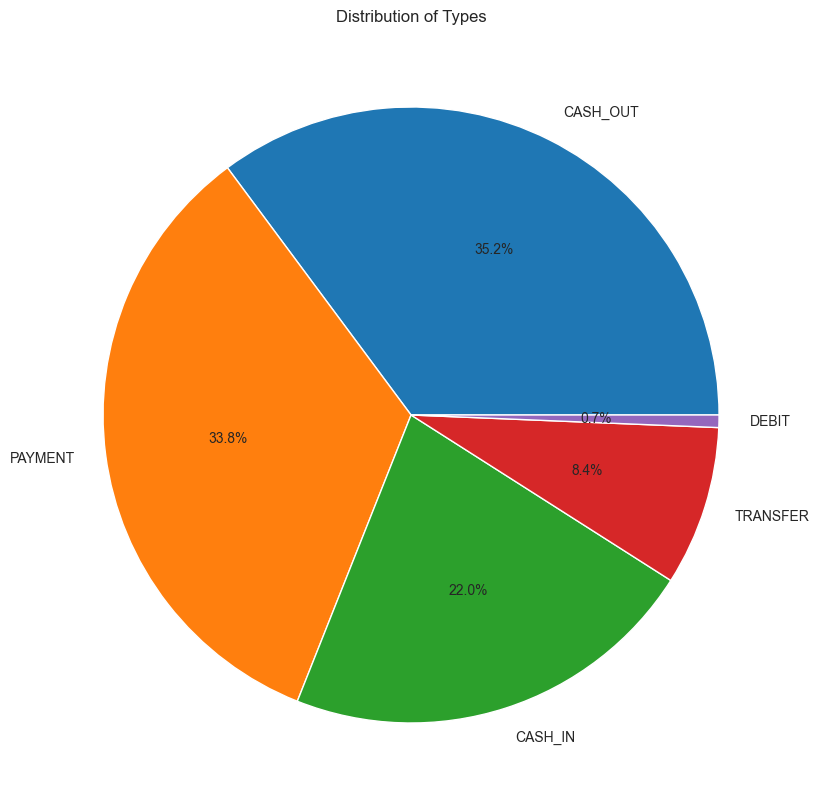

In [191]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(10, 10)) 
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.show()

- Above plot we can infer that high percentage of data is there for pyment and cash_out type.
- There is very less data for transaction type debit card.

#### Outlier deytection

In [192]:
col_num =  df.select_dtypes(exclude=object).columns
col_num

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

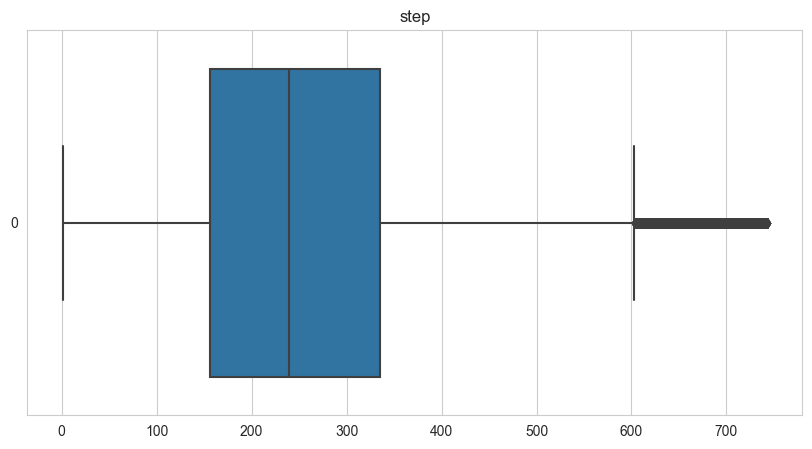

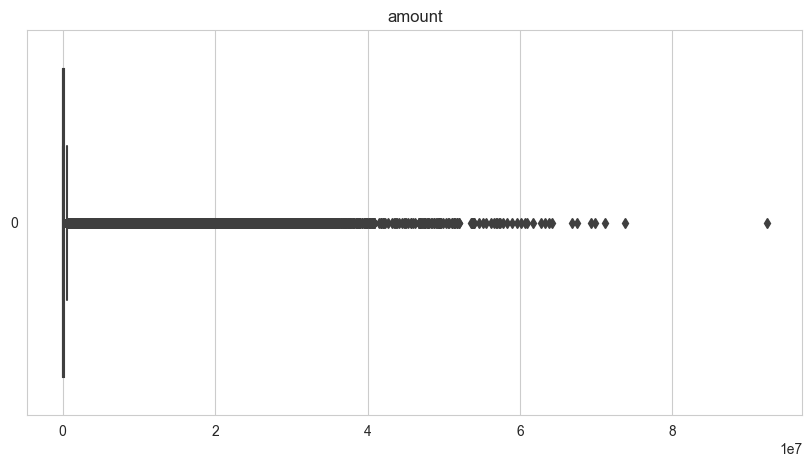

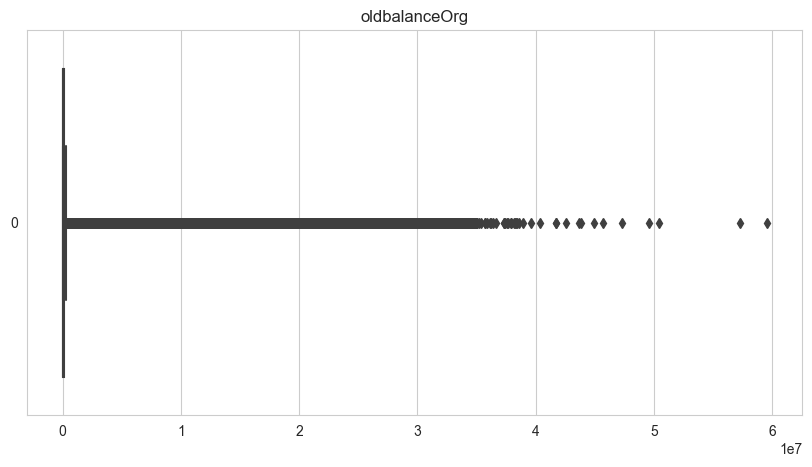

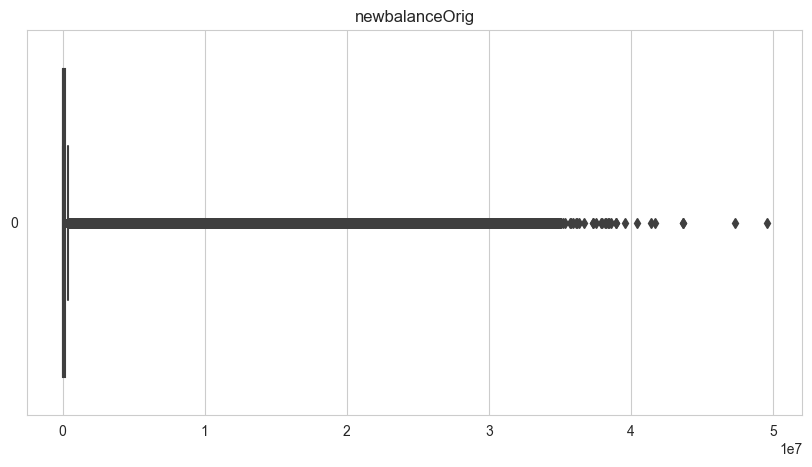

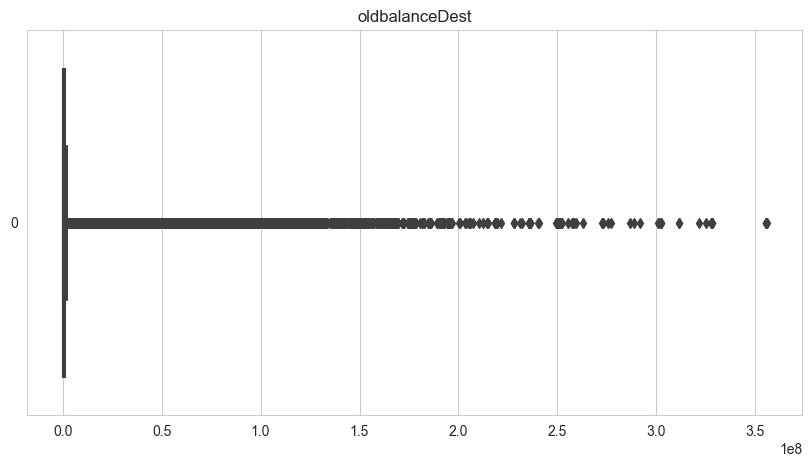

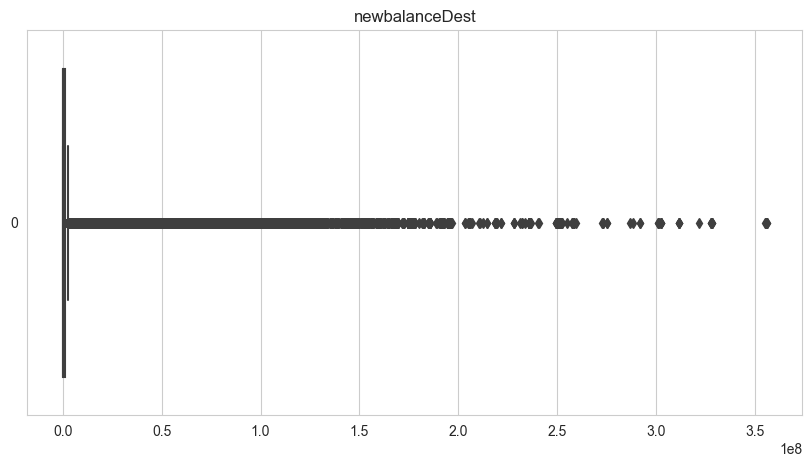

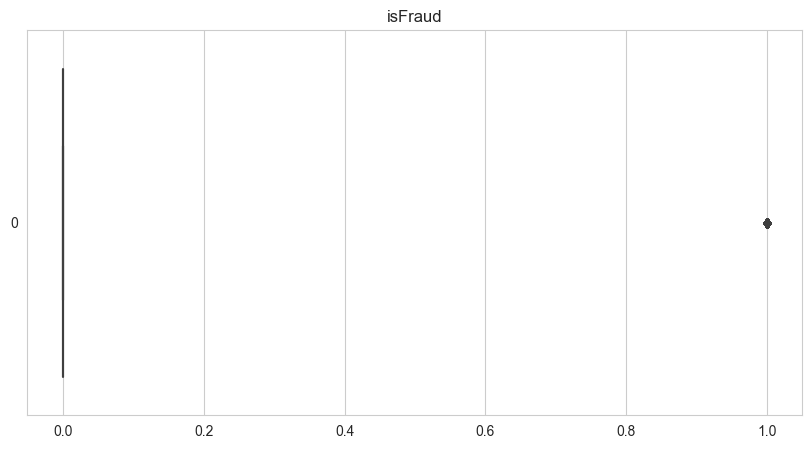

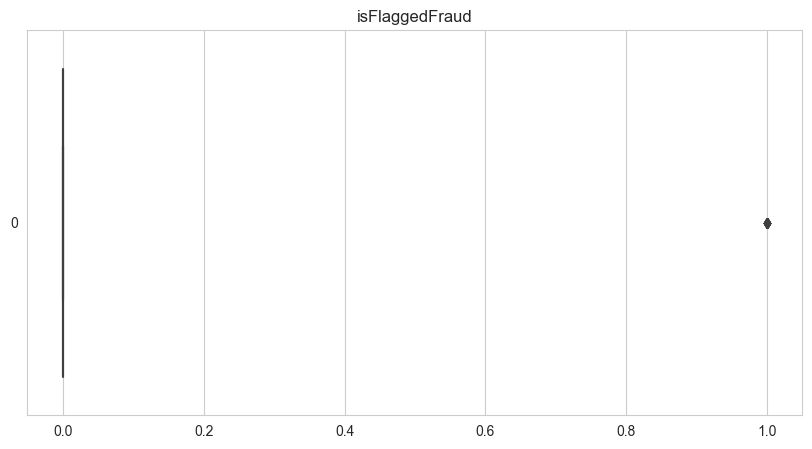

In [193]:
for col in col_num:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[col],orient='h')
    plt.title(col)
    plt.show()

##### Outlier are present in all columns

### Lets understand target column

In [194]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

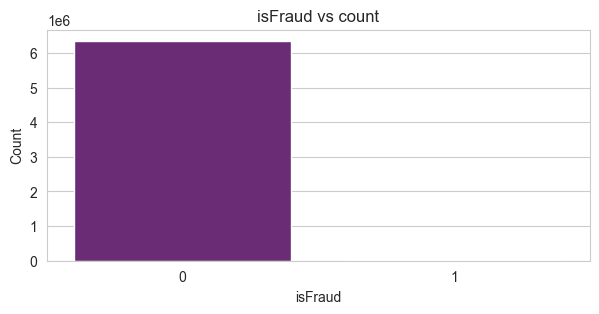

In [195]:
# Countplot of 'isFraud'
plt.figure(figsize=(7,3))
plt.title('isFraud vs count')
sns.countplot(data=df,x='isFraud',palette='magma')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

In [196]:
# Let's look at the percentage of each category in isFraud column(target column)
print("No Frauds:",df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print("Frauds:",df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


- From above we can infer that data is highly imbalanced.
- 99 percent of data is of No fraud category.
- Ratio of records is 99:1 of No-fraud with fraud

In [197]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Fraud transaction as per different type

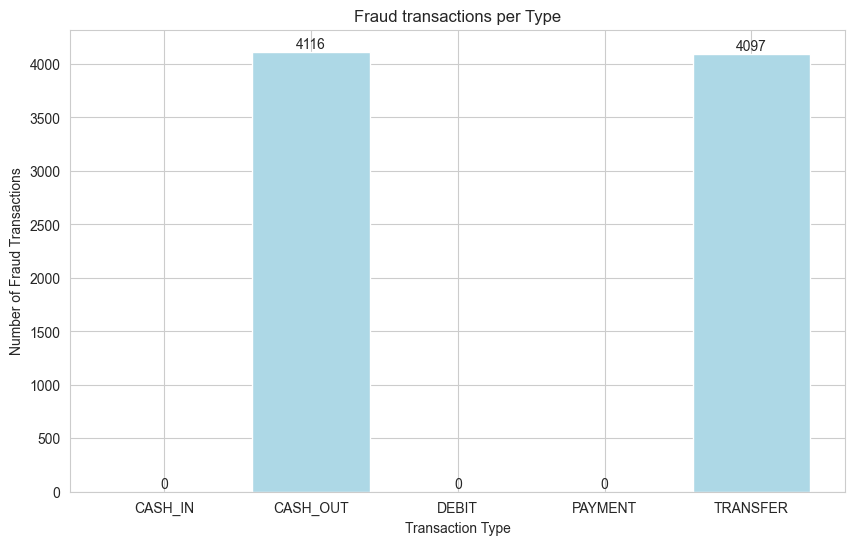

In [198]:
fraud_trans_type = df.groupby('type')['isFraud'].sum().reset_index()

# Step 2: Create the bar plot
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.bar(fraud_trans_type['type'], fraud_trans_type['isFraud'], color='lightblue')

# Step 3: Adding labels and titles
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud transactions per Type')
for index, value in enumerate(fraud_trans_type['isFraud']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


From above we can infer that fraud are happens in Cash_out and transfer mode.

In [199]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [200]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

### Label Encoding column type

In [201]:
from sklearn.preprocessing import LabelEncoder

df['type'] = LabelEncoder().fit_transform(df['type'])

### MULTICOLINEARITY

<Axes: >

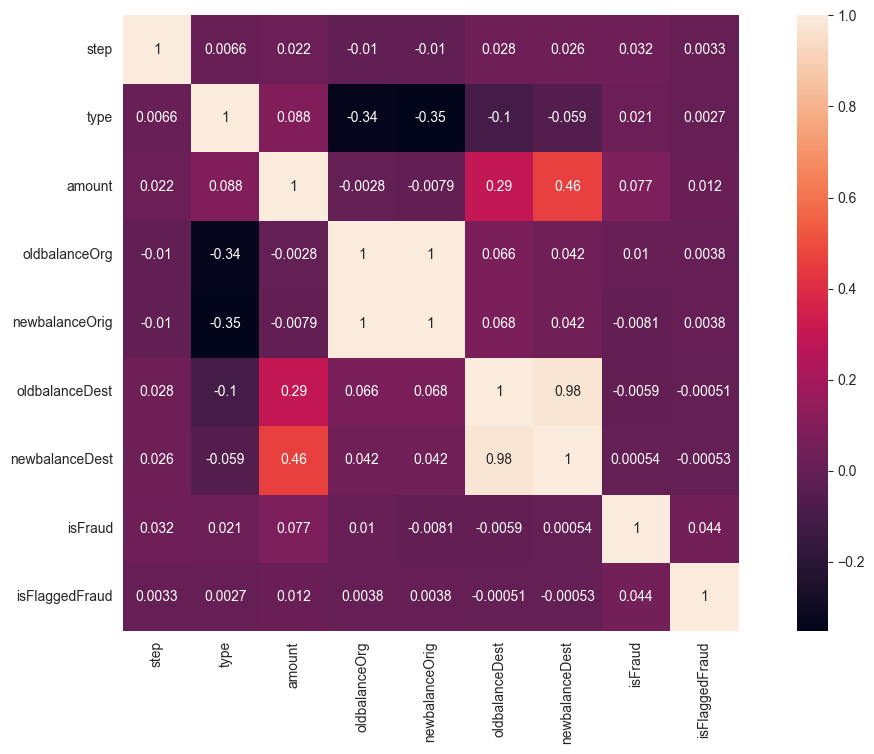

In [202]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,square=True)

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print('Variance Inflation Factor')
for i in range(df.shape[1]):
    print(df.columns[i]," : ",end=' ')
    print(variance_inflation_factor(df.values,i))

Variance Inflation Factor
step  :  2.250165911116425
type  :  2.085347534546198
amount  :  4.083183557325778
oldbalanceOrg  :  564.4392937717903
newbalanceOrig  :  568.748454118756
oldbalanceDest  :  73.12767121326486
newbalanceDest  :  84.82046715938228
isFraud  :  1.1941601835290432
isFlaggedFraud  :  1.0025645203718174


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest.

In [204]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

In [205]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,21182.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0


In [206]:
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1,inplace=True)

In [207]:
print('Variance Inflation Factor')
for i in range(df.shape[1]):
    print(df.columns[i]," : ",end=' ')
    print(variance_inflation_factor(df.values,i))

Variance Inflation Factor
step  :  2.089916143614993
type  :  2.03932831737454
amount  :  3.8833826140180028
isFraud  :  1.1879094829388495
isFlaggedFraud  :  1.0025351175865196
Actual_amount_orig  :  1.2933061926835898
Actual_amount_dest  :  3.7740300466347065


<Axes: >

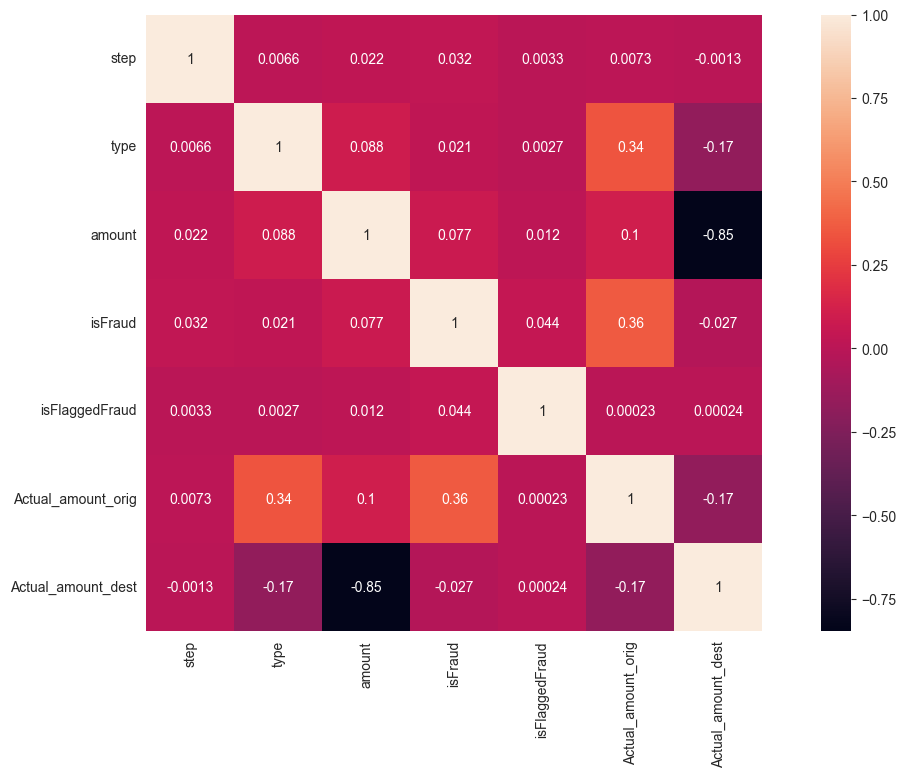

In [208]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,square=True)

As we can see now there is no high correlation between two columns

In [210]:
# Se
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [211]:
x

,step,type,amount,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
0,1,3,9839.64,0,9839.64,0.00
1,1,3,1864.28,0,1864.28,0.00
2,1,4,181.00,0,181.00,0.00
3,1,1,181.00,0,181.00,21182.00
4,1,3,11668.14,0,11668.14,0.00
...,...,...,...,...,...,...
6362615,743,1,339682.13,0,339682.13,-339682.13
6362616,743,4,6311409.28,0,6311409.28,0.00
6362617,743,1,6311409.28,0,6311409.28,-6311409.27
6362618,743,4,850002.52,0,850002.52,0.00


In [212]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

### Split data into training and testing

In [213]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

As we can see above, we need to normalize the range of features in a dataset before applying any machine learning algorithm on them.
As we have outliers in our dataset we will go for Robust Scaler as it is less prone to outliers.
As robust Scaler works with median and Inter quartile range 

In [214]:
from sklearn.preprocessing import RobustScaler

re=RobustScaler()

x_train = re.fit_transform(x_train)
x_test  = re.transform(x_test)

In [219]:
acc_score={}
pris_score={}
recal_score={}

In [217]:
from sklearn import metrics

In [220]:
# Model building Decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)
mod1 = dtree.fit(x_train,y_train)
y_predd = mod1.predict(x_test)

# Model Testing
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predd))
print()
print("Accuracy Score")
print(accuracy_score(y_test,y_predd))
print()
print("Classification Report")
print(classification_report(y_test,y_predd))
print()
acc_score['DTree'] = accuracy_score(y_test,y_predd)*100
pris_score['DTree'] = metrics.precision_score(y_test,y_predd)*100
recal_score['DTree'] = metrics.recall_score(y_test,y_predd)*100

Confusion Matrix
[[1270546     337]
 [    344    1297]]

Accuracy Score
0.9994648430992265

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.79      0.79      0.79      1641

    accuracy                           1.00   1272524
   macro avg       0.90      0.90      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524




In [221]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,criterion="entropy")
mod2 = rf.fit(x_train,y_train)
y_predrf = mod2.predict(x_test)

# Model Testing
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predrf))
print()
print("Accuracy Score")
print(accuracy_score(y_test,y_predrf))
print()
print("Classification Report")
print(classification_report(y_test,y_predrf))
print()
acc_score['RandomForest'] = accuracy_score(y_test,y_predrf)*100
pris_score['RandomForest'] = metrics.precision_score(y_test,y_predrf)*100
recal_score['RandomForest'] = metrics.recall_score(y_test,y_predrf)*100

Confusion Matrix
[[1270819      64]
 [    386    1255]]

Accuracy Score
0.9996463720919998

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.95      0.76      0.85      1641

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524




In [222]:
# Model building KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
mod3 = knn.fit(x_train,y_train)
y_predk = mod3.predict(x_test)

# Model Testing
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predk))
print()
print("Accuracy Score")
print(accuracy_score(y_test,y_predk))
print()
print("Classification Report")
print(classification_report(y_test,y_predk))
print()
acc_score['KNN'] = accuracy_score(y_test,y_predk)*100
pris_score['KNN'] = metrics.precision_score(y_test,y_predk)*100
recal_score['KNN'] = metrics.recall_score(y_test,y_predk)*100


Confusion Matrix
[[1270735     148]
 [    482    1159]]

Accuracy Score
0.9995049209287997

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.89      0.71      0.79      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.85      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524




In [223]:
# Model building Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
mod4 = lr.fit(x_train,y_train)
y_predl = mod4.predict(x_test)

# Model Testing
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predl))
print()
print("Accuracy Score")
print(accuracy_score(y_test,y_predl))
print()
print("Classification Report")
print(classification_report(y_test,y_predl))
print()
acc_score['Logistic Regression'] = accuracy_score(y_test,y_predl)*100
pris_score['Logistic Regression'] = metrics.precision_score(y_test,y_predl)*100
recal_score['Logistic Regression'] = metrics.recall_score(y_test,y_predl)*100

Confusion Matrix
[[1270777     106]
 [    884     757]]

Accuracy Score
0.9992220186023997

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.88      0.46      0.60      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.73      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524




In [224]:
# Model building Adaboost
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators=30)
mod5 = ad.fit(x_train,y_train)
y_predad = mod5.predict(x_test)

# Model Testing
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predad))
print()
print("Accuracy Score")
print(accuracy_score(y_test,y_predad))
print()
print("Classification Report")
print(classification_report(y_test,y_predad))
print()
acc_score['AdaBoost'] = accuracy_score(y_test,y_predad)*100
pris_score['AdaBoost'] = metrics.precision_score(y_test,y_predad)*100
recal_score['AdaBoost'] = metrics.recall_score(y_test,y_predad)*100

Confusion Matrix
[[1270779     104]
 [    810     831]]

Accuracy Score
0.9992817424268619

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.89      0.51      0.65      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.75      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524




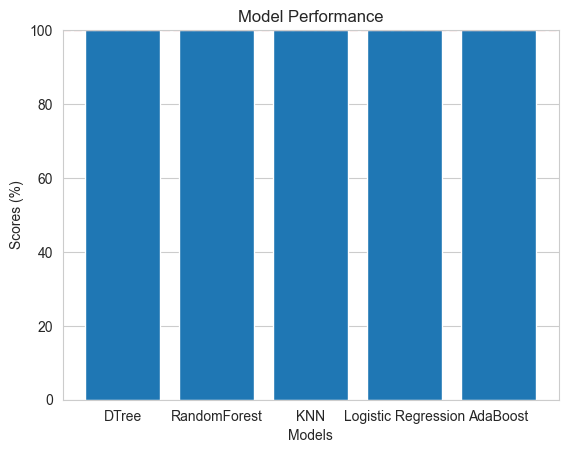

In [225]:
plt.bar(acc_score.keys(),acc_score.values())
plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.ylim(0,100)
plt.axhline(acc_score['Logistic Regression'], ls='--', color='red')
plt.title('Model Performance')
plt.show()

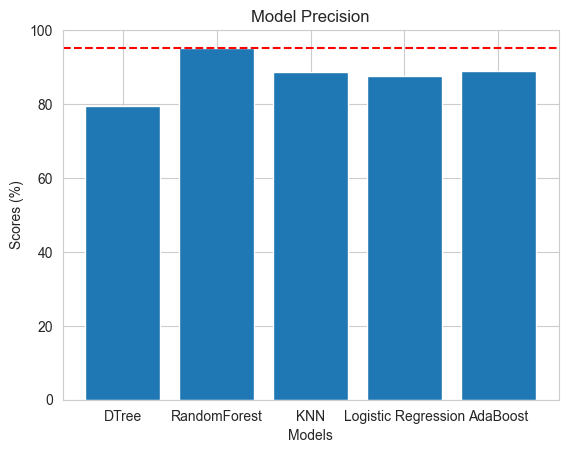

In [231]:
plt.bar(pris_score.keys(),pris_score.values())
plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.ylim(0,100)
plt.axhline(pris_score['RandomForest'], ls='--', color='red')
plt.title('Model Precision')
plt.show()

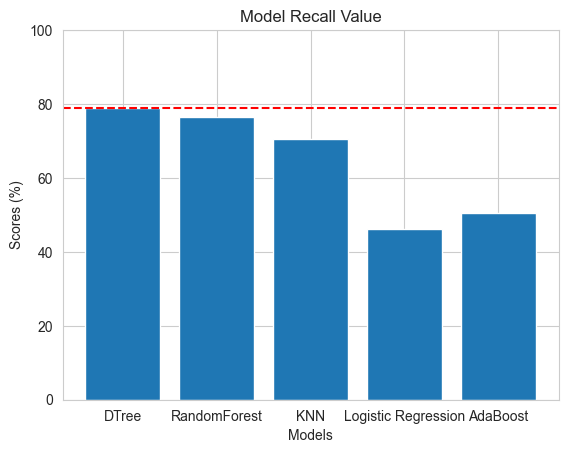

In [232]:
plt.bar(recal_score.keys(),recal_score.values())
plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.ylim(0,100)
plt.axhline(recal_score['DTree'], ls='--', color='red')
plt.title('Model Recall Value')
plt.show()

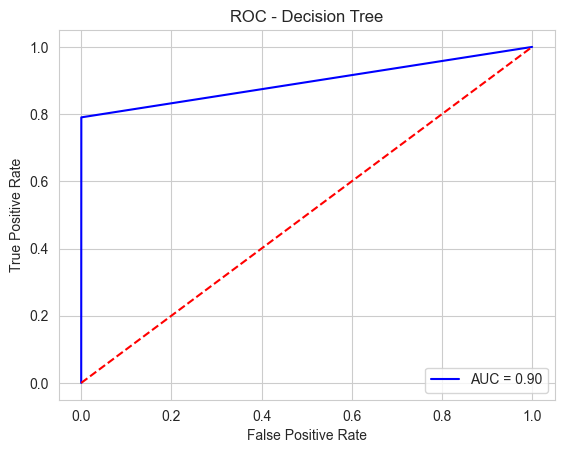

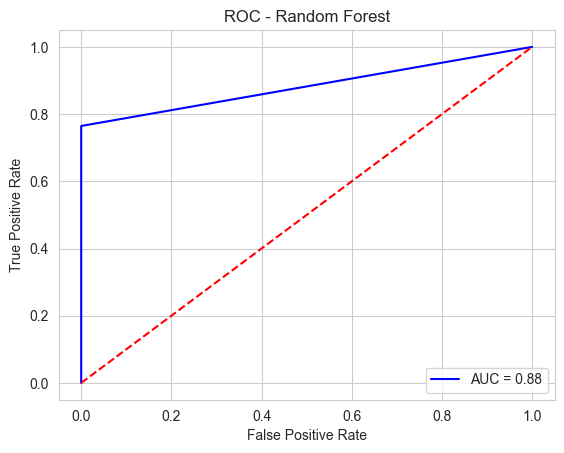

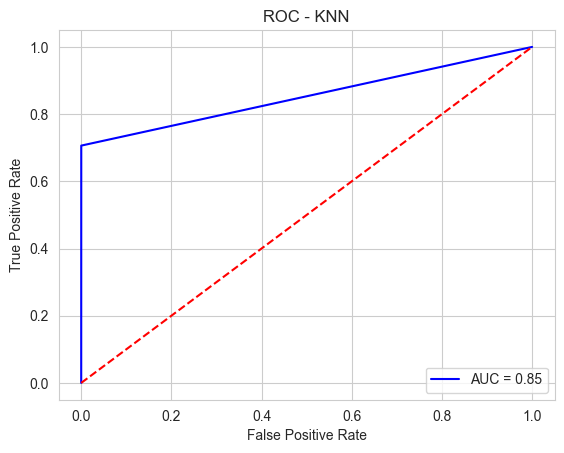

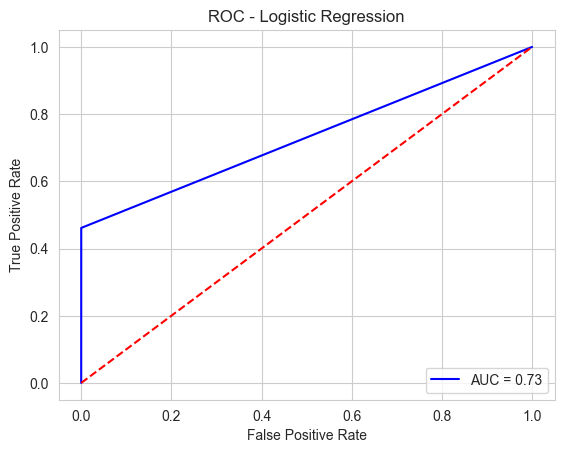

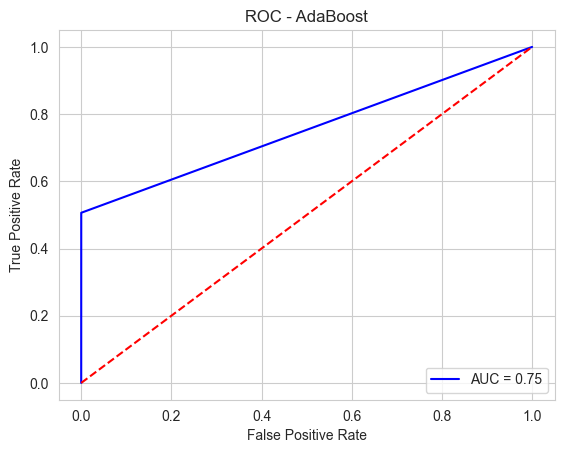

In [230]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predd)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predrf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - KNN
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predk)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - Logistic Regression
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predl)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()                 

# AUC ROC - AdaBoost
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predad)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()     